In [1]:
import numpy as np    
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [90]:
data=pd.read_csv('Lab.csv', header=None)

data.columns=['x_val', 'y_val']

# scaling data points

data['x_val']=(data['x_val']-np.average(data['x_val']))/np.std(data['x_val'])
data['y_val']=(data['y_val']-np.average(data['y_val']))/np.std(data['y_val'])


x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)

In [91]:
class linear_regression:

    def __init__(self, epoch, alpha):
        self.epoch=epoch
        self.alpha=alpha
        self.weight=None
        self.cost_array=[]
        self.training_error=[]
        self.test_error=[]

    def fit(self, x,y):
        sample, features=x.shape
        x = np.hstack((np.ones((sample, 1)), x))
        self.weight=np.zeros((features+1,1))

        for i in range(self.epoch):
            x_theta=x.dot(self.weight)
            error=x_theta-y  
            gradient=(1/sample)*x.T.dot(error)
            cost=(1/(2*sample))*np.sum(error**2)
            self.cost_array.append(cost)
            self.weight-=self.alpha*gradient
            self.training_error.append(np.sqrt(cost))
           


    

    def predict(self, x):
        
        sample, features=x.shape
        x=np.hstack((np.ones((sample,1)),x))
        y_pred=x.dot(self.weight)
        return y_pred

<Axes: xlabel='x_val', ylabel='y_val'>

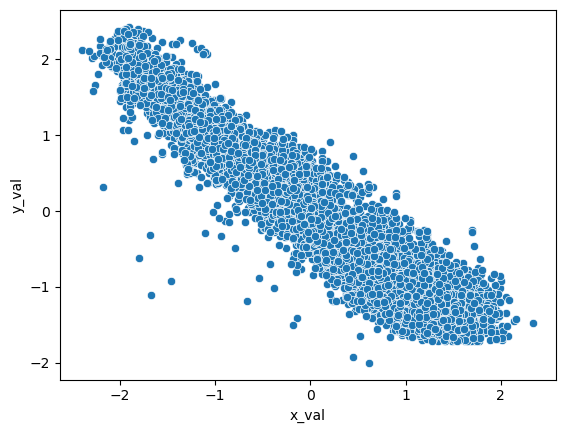

In [93]:

sns.scatterplot(x=data['x_val'], y=data['y_val'], data=data)



In [99]:
model=linear_regression(epoch=1000, alpha=0.01)

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

model.fit(x_train, y_train)

<Axes: xlabel='x_val', ylabel='y_val'>

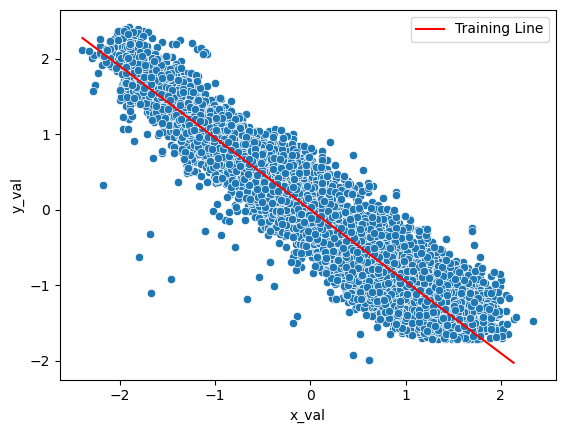

In [101]:
sns.scatterplot(x=data['x_val'], y=data['y_val'], data=data)
sns.lineplot(x=x_train.flatten(), y=model.predict(x_train).flatten(), color='red', label='Training Line')

In [102]:
y_pred=model.predict(x_test)
print('R2 score:', r2_score(y_test, y_pred))

R2 score: 0.9003240802450048


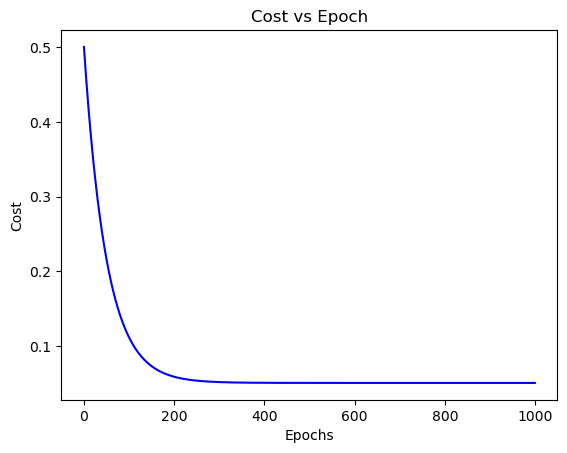

In [100]:
plt.plot(range(len(model.cost_array)), model.cost_array, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.show()
